<H2> Python Interview Test Practice </H2>

This preparation exercise will have you use the **USA_cars_datasets.csv** file to reinforce your understanding of the following functions:

<ol> Boolean Filtering </ol>
<ol> GROUP BY / Average Functions in Python </ol>
<ol> Matplotlib </ol>

Once you complete the exercise, you can use the **Answer key** file to check your answers. If you get stuck, please reach out to your mentor or reach out and ask the question on #Slack!

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
carsdata = pd.read_csv("USA_cars_datasets.csv")

In [45]:
carsdata.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300.0,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa
1,2899.0,ford,se,2011,clean vehicle,190552,silver,tennessee,usa
2,5350.0,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa
3,25000.0,ford,door,2014,clean vehicle,64146,blue,virginia,usa
4,27700.0,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa


<b>Q1. In the US, what is the average price per car in each state? Order this in descending order.<b>

In [47]:
USA=carsdata.loc[(carsdata['country'] == ' usa')].groupby('state')["price"].mean().sort_values(ascending=False) 
pd.DataFrame(USA)

,price
state,
kentucky,44969.444444
new mexico,27375.000000
washington,26771.428571
illinois,26715.707965
michigan,23899.822485
alabama,23872.058824
nevada,23653.529412
pennsylvania,22810.210702
indiana,21391.428571


<b> Q2. What is the average price per car brand within the US? Plot this out in a Bar Plot in descending order.</b>

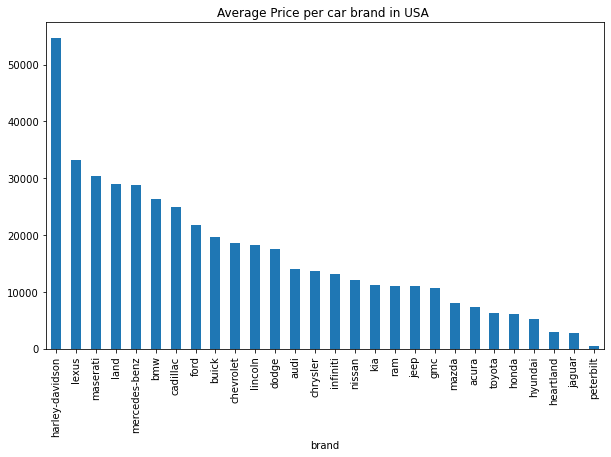

In [55]:
avg_price_car= carsdata.loc[(carsdata['country'] == ' usa')].groupby('brand')['price'].mean().sort_values(ascending=False)
avg_price_car.plot(kind="bar", title= "Average Price per car brand in USA ", figsize=(10,6))
plt.show()
                                      
                   

<b> Q3. In Canada, what is the most popular brand and color of the cars that are listed for sale? </b>

In [62]:

canadabrand = carsdata[["brand", "country"]].loc[(carsdata['country'] == ' canada')].groupby('brand').count()
print(canadabrand)
canadacolor = carsdata[["color", "country"]].loc[(carsdata['country'] == ' canada')].groupby('color').count()
print(canadacolor)

           country
brand             
chevrolet        1
dodge            6
        country
color          
orange        1
red           1
white         5


<b> Q4. Is there a substantial price difference between the average price for a clean car in the US vs. a clean car in Canada? If yes, what is the difference? </b> 

In [63]:
usaprice = carsdata.loc[(carsdata['country'] == ' usa')].groupby('title_status')['price'].mean()
canadaprice = carsdata.loc[(carsdata['country'] == ' canada')].groupby('title_status')['price'].mean()
print(usaprice)
print(canadaprice)

title_status
clean vehicle        19883.053242
salvage insurance     2333.006135
Name: price, dtype: float64
title_status
clean vehicle    30357.142857
Name: price, dtype: float64


In [67]:
pricediff = carsdata[["country", "title_status", "price"]].loc[(carsdata['title_status'] == 'clean vehicle')].groupby('country')['price'].mean()
canadaprice = float(pricediff[pricediff.index == ' canada'])
usaprice = float(pricediff[pricediff.index == ' usa'])
print("The price difference between a clean car in the US vs a clean car in Canada is ")
print(canadaprice - usaprice)


The price difference between a clean car in the US vs a clean car in Canada is 
10474.089615408207


<b> Q5. In the US / Canada - which car, brand and model is sold at the highest average price? </b>

In [82]:
USApopularity = carsdata[["country","brand", "model", "price"]].loc[(carsdata["country"] == ' usa')].groupby(["country","brand","model"]).price.mean().sort_values(ascending=False).head(1)
Canadapopularity = carsdata[["country","brand", "model", "price"]].loc[(carsdata["country"] == ' canada')].groupby(["country","brand","model"]).price.mean().sort_values(ascending=False).head(1)
print(USApopularity)

print(Canadapopularity)

country  brand          model   
 usa     mercedes-benz  sl-class    84900.0
Name: price, dtype: float64
country  brand      model
 canada  chevrolet  1500     33000.0
Name: price, dtype: float64
